In [1]:
!pip install torch==2.4.1 torchvision==0.19.1 torchaudio==2.4.1 --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.4/883.4 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207

In [2]:
!wget https://github.com/Dao-AILab/causal-conv1d/releases/download/v1.5.2/causal_conv1d-1.5.2+cu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl

!wget https://github.com/state-spaces/mamba/releases/download/v2.2.5/mamba_ssm-2.2.5+cu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl

--2025-12-14 00:00:28--  https://github.com/Dao-AILab/causal-conv1d/releases/download/v1.5.2/causal_conv1d-1.5.2+cu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/726718359/604a2e41-ef67-4125-bb18-e5c1bfafc2be?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-14T00%3A34%3A19Z&rscd=attachment%3B+filename%3Dcausal_conv1d-1.5.2%2Bcu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-13T23%3A33%3A45Z&ske=2025-12-14T00%3A34%3A19Z&sks=b&skv=2018-11-09&sig=iaPuZvVcVGkWWlC%2FqRRP0YcQp702B8q591n9gH4w6Xs%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNl

In [3]:
!pip install /kaggle/working/causal_conv1d-1.5.2+cu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl
!pip install /kaggle/working/mamba_ssm-2.2.5+cu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl

Processing ./causal_conv1d-1.5.2+cu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl
Processing ./mamba_ssm-2.2.5+cu12torch2.4cxx11abiFALSE-cp311-cp311-linux_x86_64.whl


In [4]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from timm.models.layers import trunc_normal_, DropPath
from timm.models.vision_transformer import Mlp
from einops import rearrange, repeat
from tqdm.auto import tqdm
from mamba_ssm.ops.selective_scan_interface import selective_scan_fn

device = torch.device("cuda:0")
print(f"Device: {device}")

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

Device: cuda:0


In [5]:
def window_partition(x, window_size):
    B, C, H, W = x.shape
    x = x.view(B, C, H // window_size, window_size, W // window_size, window_size)
    windows = x.permute(0, 2, 4, 3, 5, 1).reshape(-1, window_size * window_size, C)
    return windows


def window_reverse(windows, window_size, H, W):
    B = int(windows.shape[0] / (H * W / window_size / window_size))
    x = windows.reshape(B, H // window_size, W // window_size, window_size, window_size, -1)
    x = x.permute(0, 5, 1, 3, 2, 4).reshape(B, windows.shape[2], H, W)
    return x


class Downsample(nn.Module):
    def __init__(self, dim, keep_dim=False):
        super().__init__()
        dim_out = dim if keep_dim else 2 * dim
        self.reduction = nn.Sequential(nn.Conv2d(dim, dim_out, 3, 2, 1, bias=False))

    def forward(self, x):
        return self.reduction(x)


class PatchEmbed(nn.Module):
    def __init__(self, in_chans=3, in_dim=64, dim=96):
        super().__init__()
        self.proj = nn.Identity()
        self.conv_down = nn.Sequential(
            nn.Conv2d(in_chans, in_dim, 3, 2, 1, bias=False),
            nn.BatchNorm2d(in_dim, eps=1e-4),
            nn.ReLU(),
            nn.Conv2d(in_dim, dim, 3, 2, 1, bias=False),
            nn.BatchNorm2d(dim, eps=1e-4),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.proj(x)
        x = self.conv_down(x)
        return x


class ConvBlock(nn.Module):
    def __init__(self, dim, drop_path=0., layer_scale=None, kernel_size=3):
        super().__init__()
        self.conv1 = nn.Conv2d(dim, dim, kernel_size=kernel_size, stride=1, padding=1)
        self.norm1 = nn.BatchNorm2d(dim, eps=1e-5)
        self.act1 = nn.GELU(approximate='tanh')
        self.conv2 = nn.Conv2d(dim, dim, kernel_size=kernel_size, stride=1, padding=1)
        self.norm2 = nn.BatchNorm2d(dim, eps=1e-5)
        self.layer_scale = layer_scale is not None and type(layer_scale) in [int, float]
        if self.layer_scale:
            self.gamma = nn.Parameter(layer_scale * torch.ones(dim))
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        input = x
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.norm2(x)
        if self.layer_scale:
            x = x * self.gamma.view(1, -1, 1, 1)
        x = input + self.drop_path(x)
        return x

In [6]:
class MambaVisionMixer(nn.Module):
    def __init__(
        self,
        d_model,
        d_state=16,
        d_conv=4,
        expand=2,
        dt_rank="auto",
        dt_min=0.001,
        dt_max=0.1,
        dt_init="random",
        dt_scale=1.0,
        dt_init_floor=1e-4,
        conv_bias=True,
        bias=False,
        device=None,
        dtype=None,
    ):
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.d_model = d_model
        self.d_state = d_state
        self.d_conv = d_conv
        self.expand = expand
        self.d_inner = int(self.expand * self.d_model)
        self.dt_rank = math.ceil(self.d_model / 16) if dt_rank == "auto" else dt_rank

        self.in_proj = nn.Linear(self.d_model, self.d_inner, bias=bias, **factory_kwargs)
        self.x_proj = nn.Linear(self.d_inner // 2, self.dt_rank + self.d_state * 2, bias=False, **factory_kwargs)
        self.dt_proj = nn.Linear(self.dt_rank, self.d_inner // 2, bias=True, **factory_kwargs)

        dt_init_std = self.dt_rank ** -0.5 * dt_scale
        if dt_init == "constant":
            nn.init.constant_(self.dt_proj.weight, dt_init_std)
        elif dt_init == "random":
            nn.init.uniform_(self.dt_proj.weight, -dt_init_std, dt_init_std)

        dt = torch.exp(
            torch.rand(self.d_inner // 2, **factory_kwargs) * (math.log(dt_max) - math.log(dt_min)) + math.log(dt_min)
        ).clamp(min=dt_init_floor)
        inv_dt = dt + torch.log(-torch.expm1(-dt))
        with torch.no_grad():
            self.dt_proj.bias.copy_(inv_dt)
        self.dt_proj.bias._no_reinit = True

        A = repeat(
            torch.arange(1, self.d_state + 1, dtype=torch.float32, device=device),
            "n -> d n",
            d=self.d_inner // 2,
        ).contiguous()
        A_log = torch.log(A)
        self.A_log = nn.Parameter(A_log)
        self.A_log._no_weight_decay = True

        self.D = nn.Parameter(torch.ones(self.d_inner // 2, device=device))
        self.D._no_weight_decay = True

        self.out_proj = nn.Linear(self.d_inner, self.d_model, bias=bias, **factory_kwargs)

        self.conv1d_x = nn.Conv1d(
            in_channels=self.d_inner // 2,
            out_channels=self.d_inner // 2,
            bias=conv_bias,
            kernel_size=d_conv,
            groups=self.d_inner // 2,
            padding=d_conv - 1,
            **factory_kwargs,
        )
        self.conv1d_z = nn.Conv1d(
            in_channels=self.d_inner // 2,
            out_channels=self.d_inner // 2,
            bias=conv_bias,
            kernel_size=d_conv,
            groups=self.d_inner // 2,
            padding=d_conv - 1,
            **factory_kwargs,
        )

    def forward(self, hidden_states):
        batch, seqlen, _ = hidden_states.shape
        xz = self.in_proj(hidden_states)
        xz = rearrange(xz, "b l d -> b d l")
        x, z = xz.chunk(2, dim=1)

        A = -torch.exp(self.A_log.float())

        x = F.silu(self.conv1d_x(x)[:, :, :seqlen])
        z = F.silu(self.conv1d_z(z)[:, :, :seqlen])

        x_dbl = self.x_proj(rearrange(x, "b d l -> (b l) d"))
        dt, B, C = torch.split(x_dbl, [self.dt_rank, self.d_state, self.d_state], dim=-1)
        dt = rearrange(self.dt_proj(dt), "(b l) d -> b d l", l=seqlen)
        B = rearrange(B, "(b l) dstate -> b dstate l", l=seqlen).contiguous()
        C = rearrange(C, "(b l) dstate -> b dstate l", l=seqlen).contiguous()

        y = selective_scan_fn(
            x, dt, A, B, C, self.D.float(),
            z=None, delta_bias=self.dt_proj.bias.float(), delta_softplus=True, return_last_state=None
        )

        y = torch.cat([y, z], dim=1)
        y = rearrange(y, "b d l -> b l d")
        out = self.out_proj(y)
        return out

In [7]:
class Attention(nn.Module):
    def __init__(self, dim, num_heads=8, qkv_bias=False, qk_norm=False, attn_drop=0., proj_drop=0., norm_layer=nn.LayerNorm):
        super().__init__()
        assert dim % num_heads == 0
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        self.scale = self.head_dim ** -0.5
        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.q_norm = norm_layer(self.head_dim) if qk_norm else nn.Identity()
        self.k_norm = norm_layer(self.head_dim) if qk_norm else nn.Identity()
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv.unbind(0)
        q, k = self.q_norm(q), self.k_norm(k)
        x = F.scaled_dot_product_attention(q, k, v, dropout_p=self.attn_drop.p if self.training else 0.)
        x = x.transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class Block(nn.Module):
    def __init__(self, dim, num_heads, counter, transformer_blocks, mlp_ratio=4., qkv_bias=False, qk_scale=False,
                 drop=0., attn_drop=0., drop_path=0., act_layer=nn.GELU, norm_layer=nn.LayerNorm, layer_scale=None):
        super().__init__()
        self.norm1 = norm_layer(dim)

        if counter in transformer_blocks:
            self.mixer = Attention(dim, num_heads=num_heads, qkv_bias=qkv_bias, qk_norm=qk_scale,
                                   attn_drop=attn_drop, proj_drop=drop, norm_layer=norm_layer)
        else:
            self.mixer = MambaVisionMixer(d_model=dim, d_state=8, d_conv=3, expand=1)

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        use_layer_scale = layer_scale is not None and type(layer_scale) in [int, float]
        self.gamma_1 = nn.Parameter(layer_scale * torch.ones(dim)) if use_layer_scale else 1
        self.gamma_2 = nn.Parameter(layer_scale * torch.ones(dim)) if use_layer_scale else 1

    def forward(self, x):
        x = x + self.drop_path(self.gamma_1 * self.mixer(self.norm1(x)))
        x = x + self.drop_path(self.gamma_2 * self.mlp(self.norm2(x)))
        return x

In [8]:
class MambaVisionLayer(nn.Module):
    def __init__(self, dim, depth, num_heads, window_size, conv=False, downsample=True, mlp_ratio=4.,
                 qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0.,
                 layer_scale=None, layer_scale_conv=None, transformer_blocks=[]):
        super().__init__()
        self.conv = conv
        self.transformer_block = False
        self.window_size = window_size

        if conv:
            self.blocks = nn.ModuleList([
                ConvBlock(dim=dim, drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                          layer_scale=layer_scale_conv)
                for i in range(depth)
            ])
            self.transformer_block = False
        else:
            self.blocks = nn.ModuleList([
                Block(dim=dim, counter=i, transformer_blocks=transformer_blocks, num_heads=num_heads,
                      mlp_ratio=mlp_ratio, qkv_bias=qkv_bias, qk_scale=qk_scale, drop=drop, attn_drop=attn_drop,
                      drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path, layer_scale=layer_scale)
                for i in range(depth)
            ])
            self.transformer_block = True

        self.downsample = None if not downsample else Downsample(dim=dim)

    def forward(self, x):
        _, _, H, W = x.shape

        if self.transformer_block:
            pad_r = (self.window_size - W % self.window_size) % self.window_size
            pad_b = (self.window_size - H % self.window_size) % self.window_size
            if pad_r > 0 or pad_b > 0:
                x = F.pad(x, (0, pad_r, 0, pad_b))
                _, _, Hp, Wp = x.shape
            else:
                Hp, Wp = H, W
            x = window_partition(x, self.window_size)

        for blk in self.blocks:
            x = blk(x)

        if self.transformer_block:
            x = window_reverse(x, self.window_size, Hp, Wp)
            if pad_r > 0 or pad_b > 0:
                x = x[:, :, :H, :W].contiguous()

        if self.downsample is None:
            return x
        return self.downsample(x)


class MambaVision(nn.Module):
    def __init__(self, dim=80, in_dim=32, depths=[1, 3, 8, 4], window_size=[8, 8, 14, 7], mlp_ratio=4,
                 num_heads=[2, 4, 8, 16], drop_path_rate=0.2, in_chans=3, num_classes=10, qkv_bias=True,
                 qk_scale=None, drop_rate=0., attn_drop_rate=0., layer_scale=None, layer_scale_conv=None, **kwargs):
        super().__init__()
        num_features = int(dim * 2 ** (len(depths) - 1))
        self.num_classes = num_classes
        self.patch_embed = PatchEmbed(in_chans=in_chans, in_dim=in_dim, dim=dim)

        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]

        self.levels = nn.ModuleList()
        for i in range(len(depths)):
            conv = True if (i == 0 or i == 1) else False
            level = MambaVisionLayer(
                dim=int(dim * 2 ** i), depth=depths[i], num_heads=num_heads[i], window_size=window_size[i],
                mlp_ratio=mlp_ratio, qkv_bias=qkv_bias, qk_scale=qk_scale, conv=conv, drop=drop_rate,
                attn_drop=attn_drop_rate, drop_path=dpr[sum(depths[:i]):sum(depths[:i + 1])],
                downsample=(i < 3), layer_scale=layer_scale, layer_scale_conv=layer_scale_conv,
                transformer_blocks=list(range(depths[i] // 2 + 1, depths[i])) if depths[i] % 2 != 0
                                   else list(range(depths[i] // 2, depths[i])),
            )
            self.levels.append(level)

        self.norm = nn.BatchNorm2d(num_features)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.head = nn.Linear(num_features, num_classes) if num_classes > 0 else nn.Identity()
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.ones_(m.weight)
            nn.init.zeros_(m.bias)

    def forward_features(self, x):
        x = self.patch_embed(x)
        for level in self.levels:
            x = level(x)
        x = self.norm(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = self.head(x)
        return x


def mamba_vision_tiny(num_classes=10, **kwargs):
    return MambaVision(
        dim=80, in_dim=32, depths=[1, 3, 8, 4], num_heads=[2, 4, 8, 16],
        window_size=[8, 8, 14, 7], mlp_ratio=4, drop_path_rate=0.2, num_classes=num_classes, **kwargs
    )

In [9]:
BATCH_SIZE = 128
IMG_SIZE = 224

transform_train = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomCrop(IMG_SIZE, padding=28),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

transform_test = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 78954289.67it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
model = mamba_vision_tiny(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.05)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Total parameters: 31,162,218
Trainable parameters: 31,162,218


In [11]:
def train_epoch(model, loader, criterion, optimizer, device, max_grad_norm=1.0):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    pbar = tqdm(loader, desc="Training", leave=False)
    for inputs, targets in pbar:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        pbar.set_postfix(loss=loss.item(), acc=100. * correct / total)

    return total_loss / len(loader), 100. * correct / total


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    pbar = tqdm(loader, desc="Evaluating", leave=False)
    with torch.no_grad():
        for inputs, targets in pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            pbar.set_postfix(loss=loss.item(), acc=100. * correct / total)

    return total_loss / len(loader), 100. * correct / total

In [12]:
num_epochs = 50
max_grad_norm = 1.0

train_losses, train_accs = [], []
test_losses, test_accs = [], []
best_acc = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs} (LR: {scheduler.get_last_lr()[0]:.6f})")

    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device, max_grad_norm)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)

    scheduler.step()

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), 'mambavision_best.pth')

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}% (Best: {best_acc:.2f}%)")


Epoch 1/50 (LR: 0.001000)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 1.8116, Train Acc: 31.32%
Test Loss: 1.6164, Test Acc: 39.08% (Best: 39.08%)

Epoch 2/50 (LR: 0.000999)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 1.5266, Train Acc: 43.72%
Test Loss: 1.4869, Test Acc: 46.51% (Best: 46.51%)

Epoch 3/50 (LR: 0.000996)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 1.3456, Train Acc: 51.20%
Test Loss: 1.3210, Test Acc: 52.22% (Best: 52.22%)

Epoch 4/50 (LR: 0.000991)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 1.2002, Train Acc: 56.73%
Test Loss: 1.2904, Test Acc: 54.42% (Best: 54.42%)

Epoch 5/50 (LR: 0.000984)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 1.0889, Train Acc: 61.23%
Test Loss: 1.1618, Test Acc: 59.10% (Best: 59.10%)

Epoch 6/50 (LR: 0.000976)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 1.0016, Train Acc: 64.47%
Test Loss: 1.0445, Test Acc: 63.13% (Best: 63.13%)

Epoch 7/50 (LR: 0.000965)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.9210, Train Acc: 67.42%
Test Loss: 0.9278, Test Acc: 67.21% (Best: 67.21%)

Epoch 8/50 (LR: 0.000953)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.8617, Train Acc: 69.70%
Test Loss: 0.8967, Test Acc: 69.46% (Best: 69.46%)

Epoch 9/50 (LR: 0.000939)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.8071, Train Acc: 71.81%
Test Loss: 0.8024, Test Acc: 71.90% (Best: 71.90%)

Epoch 10/50 (LR: 0.000923)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.7575, Train Acc: 73.36%
Test Loss: 0.7617, Test Acc: 73.46% (Best: 73.46%)

Epoch 11/50 (LR: 0.000905)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.7227, Train Acc: 74.67%
Test Loss: 0.7200, Test Acc: 74.67% (Best: 74.67%)

Epoch 12/50 (LR: 0.000886)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.6898, Train Acc: 75.96%
Test Loss: 0.7144, Test Acc: 75.79% (Best: 75.79%)

Epoch 13/50 (LR: 0.000866)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.6505, Train Acc: 77.49%
Test Loss: 0.6530, Test Acc: 77.49% (Best: 77.49%)

Epoch 14/50 (LR: 0.000844)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.6230, Train Acc: 78.40%
Test Loss: 0.6971, Test Acc: 76.48% (Best: 77.49%)

Epoch 15/50 (LR: 0.000821)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.5986, Train Acc: 79.26%
Test Loss: 0.6515, Test Acc: 78.05% (Best: 78.05%)

Epoch 16/50 (LR: 0.000796)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.5748, Train Acc: 80.05%
Test Loss: 0.6159, Test Acc: 79.39% (Best: 79.39%)

Epoch 17/50 (LR: 0.000770)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.5444, Train Acc: 81.26%
Test Loss: 0.5866, Test Acc: 80.40% (Best: 80.40%)

Epoch 18/50 (LR: 0.000743)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.5182, Train Acc: 82.14%
Test Loss: 0.5410, Test Acc: 81.75% (Best: 81.75%)

Epoch 19/50 (LR: 0.000716)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.5023, Train Acc: 82.72%
Test Loss: 0.5188, Test Acc: 82.42% (Best: 82.42%)

Epoch 20/50 (LR: 0.000687)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.4854, Train Acc: 83.20%
Test Loss: 0.5267, Test Acc: 82.02% (Best: 82.42%)

Epoch 21/50 (LR: 0.000658)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.4645, Train Acc: 83.85%
Test Loss: 0.5181, Test Acc: 82.79% (Best: 82.79%)

Epoch 22/50 (LR: 0.000628)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.4427, Train Acc: 84.71%
Test Loss: 0.5177, Test Acc: 82.30% (Best: 82.79%)

Epoch 23/50 (LR: 0.000598)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.4272, Train Acc: 85.24%
Test Loss: 0.4873, Test Acc: 83.63% (Best: 83.63%)

Epoch 24/50 (LR: 0.000567)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.4127, Train Acc: 85.68%
Test Loss: 0.4847, Test Acc: 83.64% (Best: 83.64%)

Epoch 25/50 (LR: 0.000536)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.3950, Train Acc: 86.28%
Test Loss: 0.4459, Test Acc: 85.05% (Best: 85.05%)

Epoch 26/50 (LR: 0.000505)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.3722, Train Acc: 87.05%
Test Loss: 0.4321, Test Acc: 85.39% (Best: 85.39%)

Epoch 27/50 (LR: 0.000474)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.3612, Train Acc: 87.51%
Test Loss: 0.4303, Test Acc: 85.57% (Best: 85.57%)

Epoch 28/50 (LR: 0.000443)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.3484, Train Acc: 87.91%
Test Loss: 0.4332, Test Acc: 85.32% (Best: 85.57%)

Epoch 29/50 (LR: 0.000412)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.3335, Train Acc: 88.37%
Test Loss: 0.4110, Test Acc: 86.42% (Best: 86.42%)

Epoch 30/50 (LR: 0.000382)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.3173, Train Acc: 89.10%
Test Loss: 0.4305, Test Acc: 85.99% (Best: 86.42%)

Epoch 31/50 (LR: 0.000352)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.3013, Train Acc: 89.40%
Test Loss: 0.4019, Test Acc: 86.95% (Best: 86.95%)

Epoch 32/50 (LR: 0.000323)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2915, Train Acc: 89.79%
Test Loss: 0.3923, Test Acc: 87.10% (Best: 87.10%)

Epoch 33/50 (LR: 0.000294)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2758, Train Acc: 90.37%
Test Loss: 0.3964, Test Acc: 86.55% (Best: 87.10%)

Epoch 34/50 (LR: 0.000267)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2710, Train Acc: 90.55%
Test Loss: 0.3710, Test Acc: 87.69% (Best: 87.69%)

Epoch 35/50 (LR: 0.000240)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2594, Train Acc: 91.00%
Test Loss: 0.3708, Test Acc: 87.91% (Best: 87.91%)

Epoch 36/50 (LR: 0.000214)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2468, Train Acc: 91.36%
Test Loss: 0.3769, Test Acc: 87.35% (Best: 87.91%)

Epoch 37/50 (LR: 0.000189)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2381, Train Acc: 91.69%
Test Loss: 0.3620, Test Acc: 88.20% (Best: 88.20%)

Epoch 38/50 (LR: 0.000166)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2270, Train Acc: 91.98%
Test Loss: 0.3728, Test Acc: 87.90% (Best: 88.20%)

Epoch 39/50 (LR: 0.000144)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2191, Train Acc: 92.25%
Test Loss: 0.3632, Test Acc: 88.26% (Best: 88.26%)

Epoch 40/50 (LR: 0.000124)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2095, Train Acc: 92.77%
Test Loss: 0.3543, Test Acc: 88.28% (Best: 88.28%)

Epoch 41/50 (LR: 0.000105)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.2018, Train Acc: 92.92%
Test Loss: 0.3515, Test Acc: 88.62% (Best: 88.62%)

Epoch 42/50 (LR: 0.000087)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1950, Train Acc: 93.09%
Test Loss: 0.3483, Test Acc: 88.68% (Best: 88.68%)

Epoch 43/50 (LR: 0.000071)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1894, Train Acc: 93.50%
Test Loss: 0.3487, Test Acc: 88.63% (Best: 88.68%)

Epoch 44/50 (LR: 0.000057)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1834, Train Acc: 93.68%
Test Loss: 0.3478, Test Acc: 88.70% (Best: 88.70%)

Epoch 45/50 (LR: 0.000045)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1811, Train Acc: 93.68%
Test Loss: 0.3489, Test Acc: 88.85% (Best: 88.85%)

Epoch 46/50 (LR: 0.000034)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1787, Train Acc: 93.83%
Test Loss: 0.3440, Test Acc: 89.02% (Best: 89.02%)

Epoch 47/50 (LR: 0.000026)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1741, Train Acc: 93.82%
Test Loss: 0.3447, Test Acc: 88.99% (Best: 89.02%)

Epoch 48/50 (LR: 0.000019)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1751, Train Acc: 93.91%
Test Loss: 0.3451, Test Acc: 89.01% (Best: 89.02%)

Epoch 49/50 (LR: 0.000014)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1727, Train Acc: 94.01%
Test Loss: 0.3469, Test Acc: 88.93% (Best: 89.02%)

Epoch 50/50 (LR: 0.000011)


Training:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Train Loss: 0.1703, Train Acc: 94.08%
Test Loss: 0.3460, Test Acc: 89.08% (Best: 89.08%)


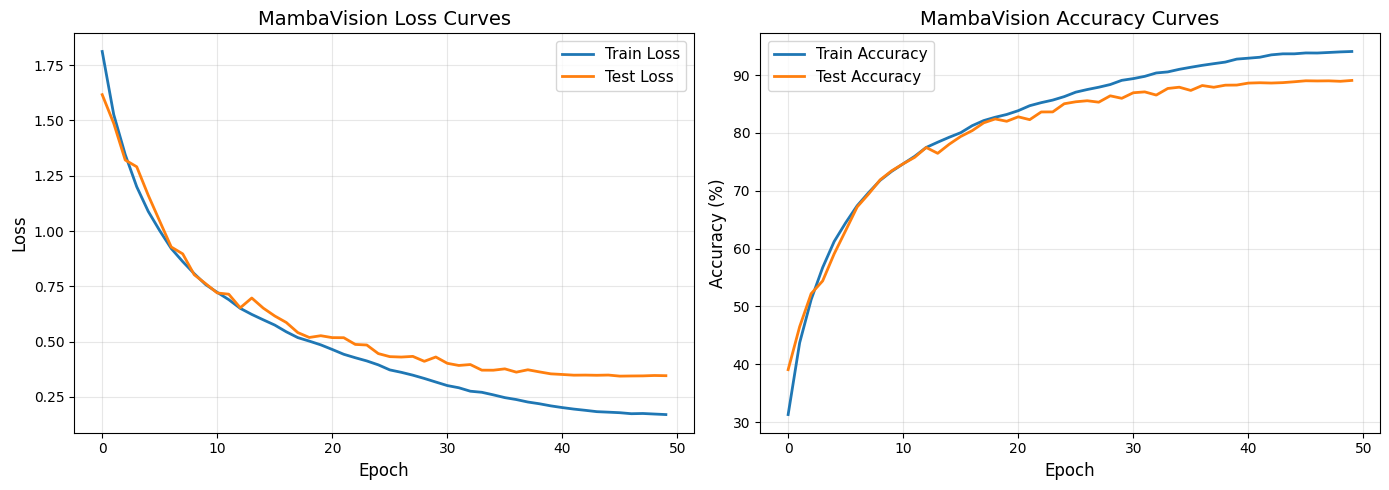

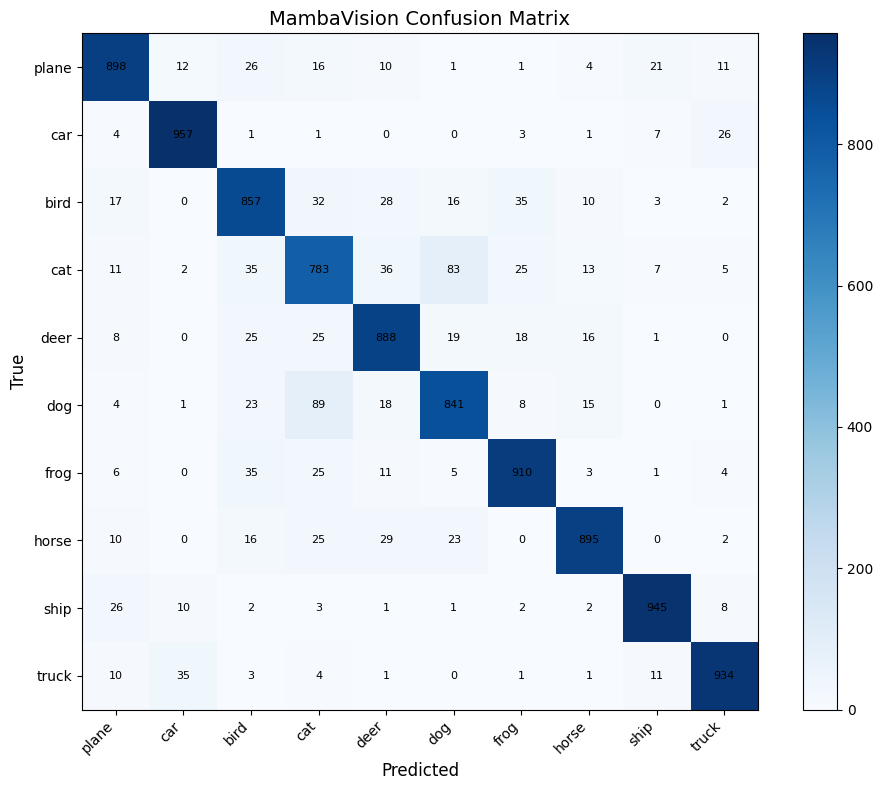

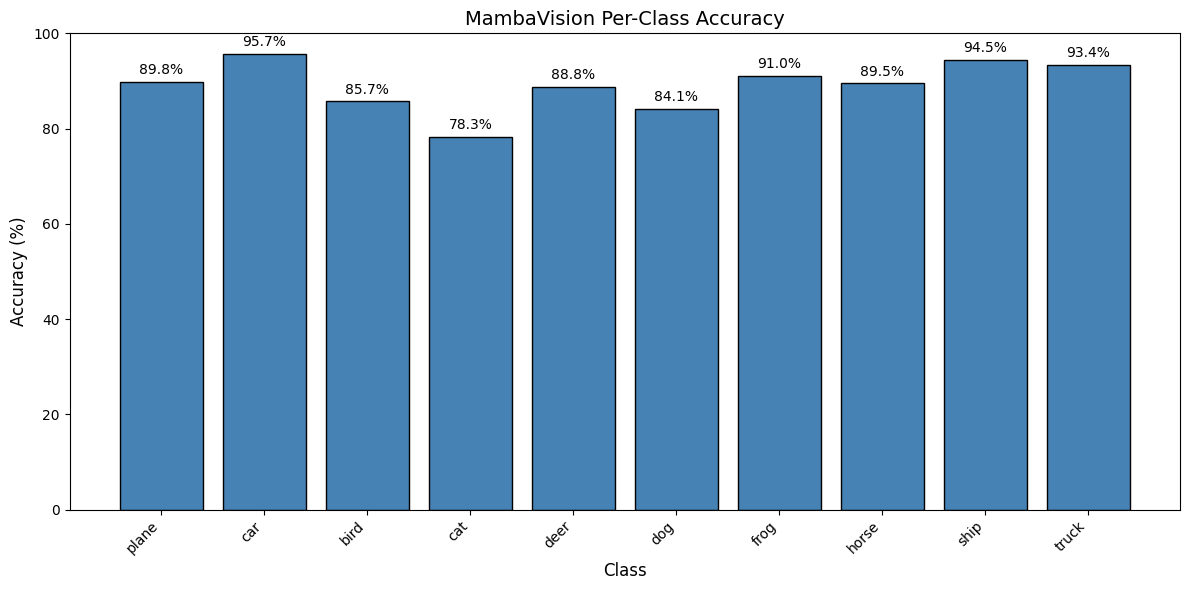


Best Test Accuracy: 89.08%
Final Test Accuracy: 89.08%
Total Parameters: 31,162,218


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(train_losses, label='Train Loss', linewidth=2)
axes[0].plot(test_losses, label='Test Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('MambaVision Loss Curves', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(train_accs, label='Train Accuracy', linewidth=2)
axes[1].plot(test_accs, label='Test Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('MambaVision Accuracy Curves', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mambavision_training_curves.png', dpi=150)
plt.show()

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(targets.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

confusion_matrix = np.zeros((10, 10), dtype=np.int32)
for pred, label in zip(all_preds, all_labels):
    confusion_matrix[label, pred] += 1

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(confusion_matrix, cmap='Blues')
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticklabels(classes)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('MambaVision Confusion Matrix', fontsize=14)

for i in range(10):
    for j in range(10):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', fontsize=8)

plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.savefig('mambavision_confusion_matrix.png', dpi=150)
plt.show()

class_correct = confusion_matrix.diagonal()
class_total = confusion_matrix.sum(axis=1)
class_accuracy = class_correct / class_total * 100

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(classes, class_accuracy, color='steelblue', edgecolor='black')
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('MambaVision Per-Class Accuracy', fontsize=14)
ax.set_ylim(0, 100)

for bar, acc in zip(bars, class_accuracy):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{acc:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mambavision_class_accuracy.png', dpi=150)
plt.show()

print(f"\nBest Test Accuracy: {best_acc:.2f}%")
print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")
print(f"Total Parameters: {total_params:,}")

Найдено MambaVisionMixer блоков: 6


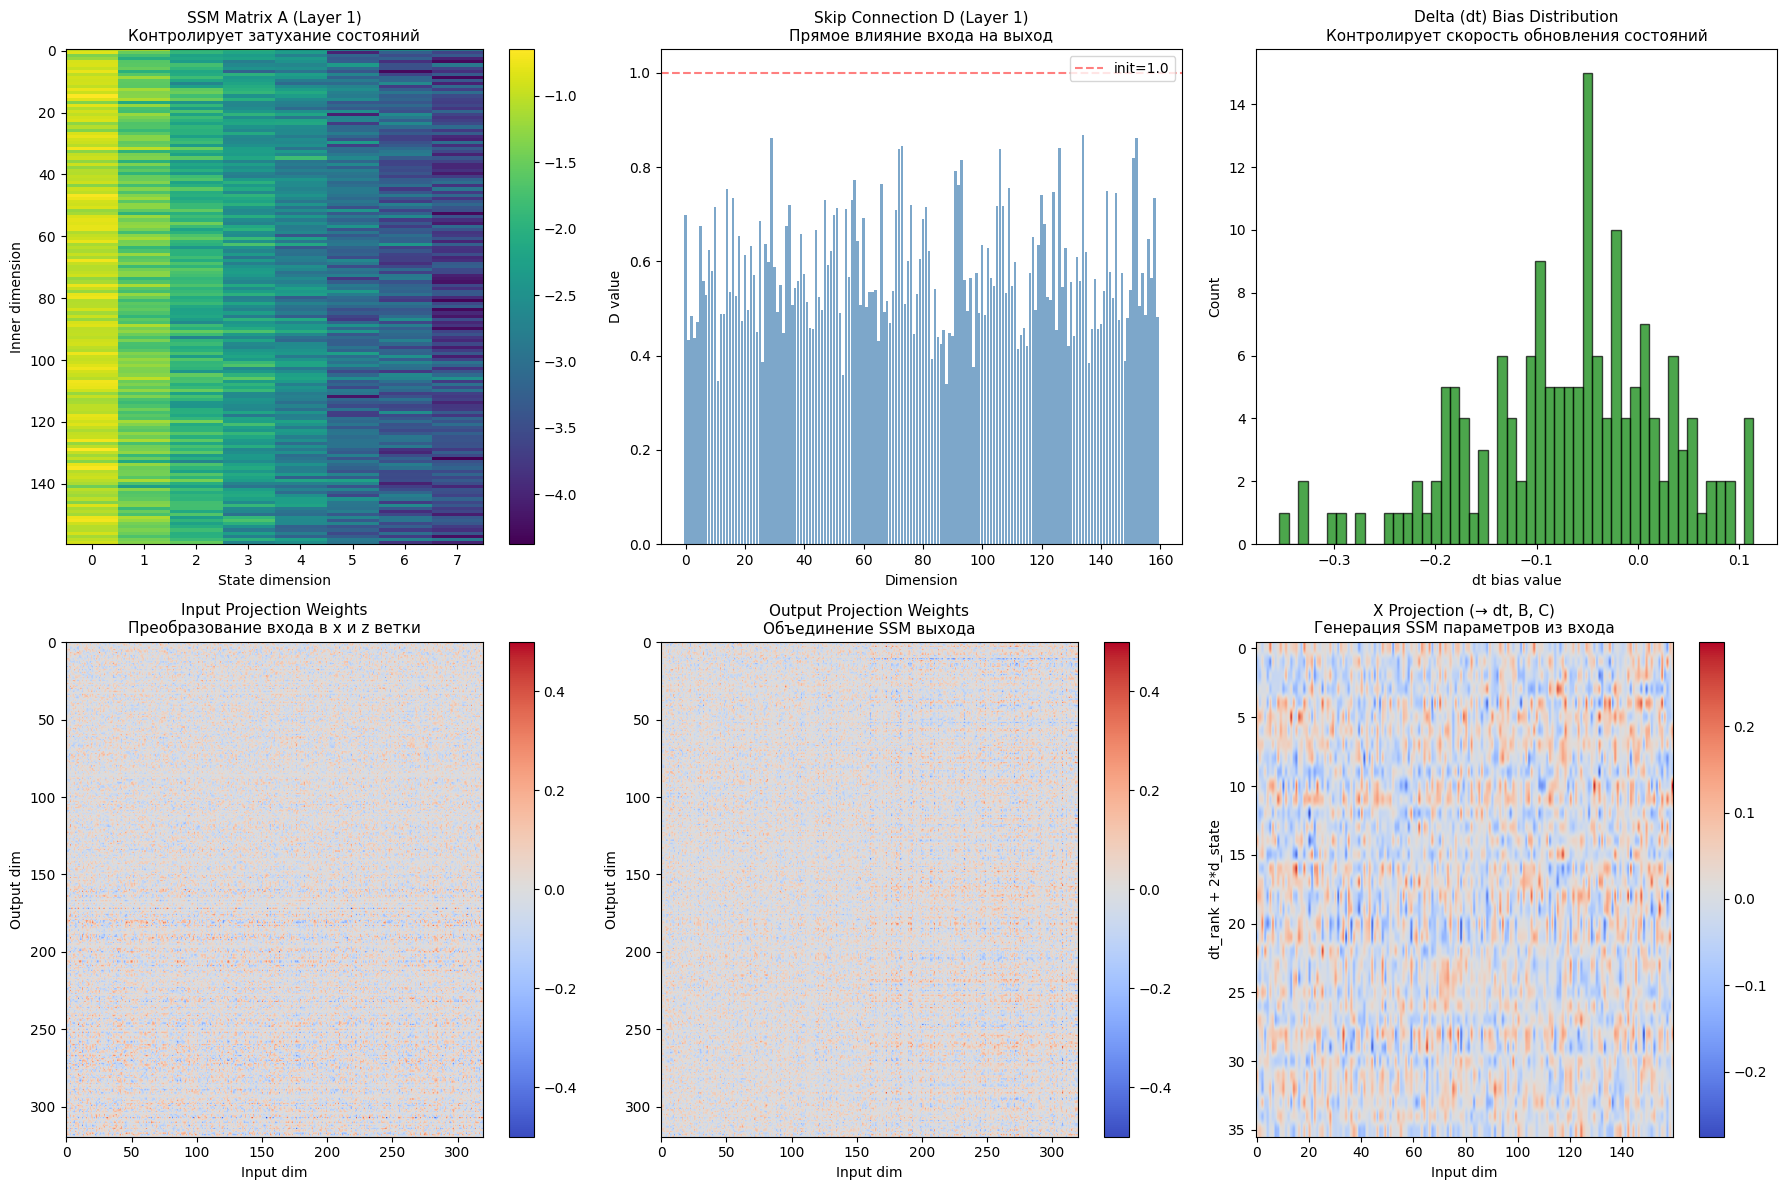

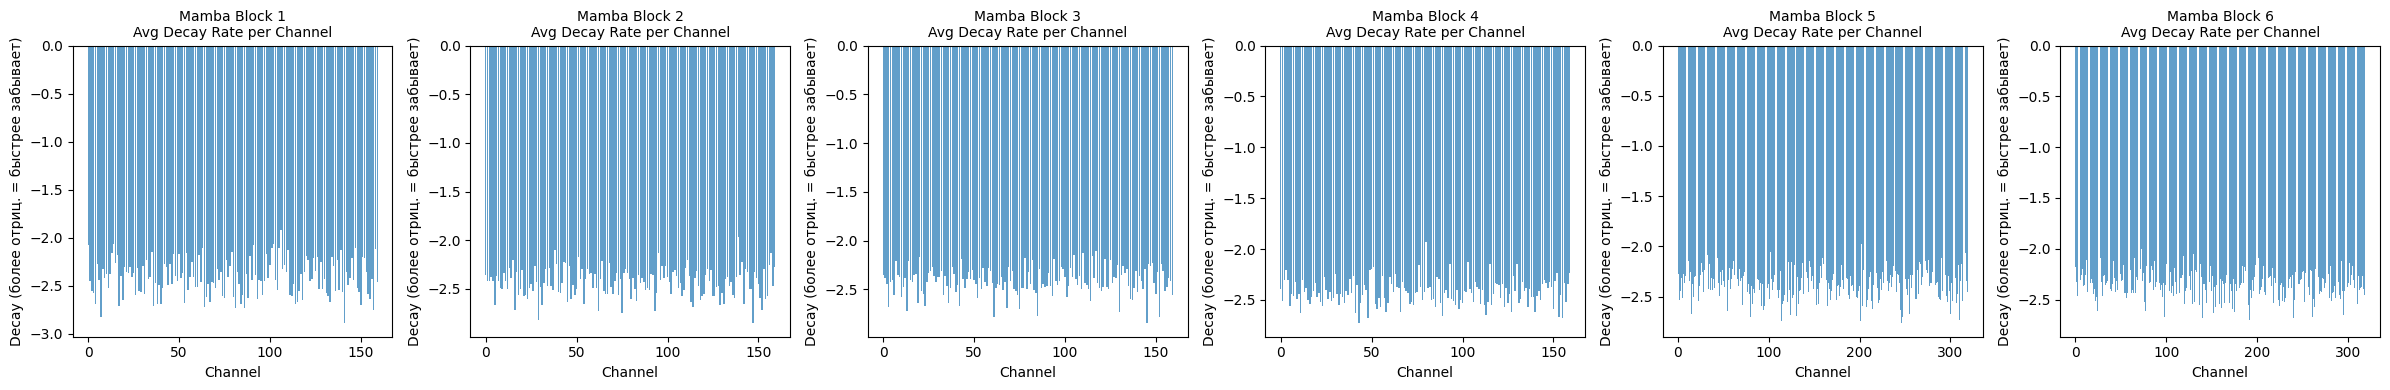

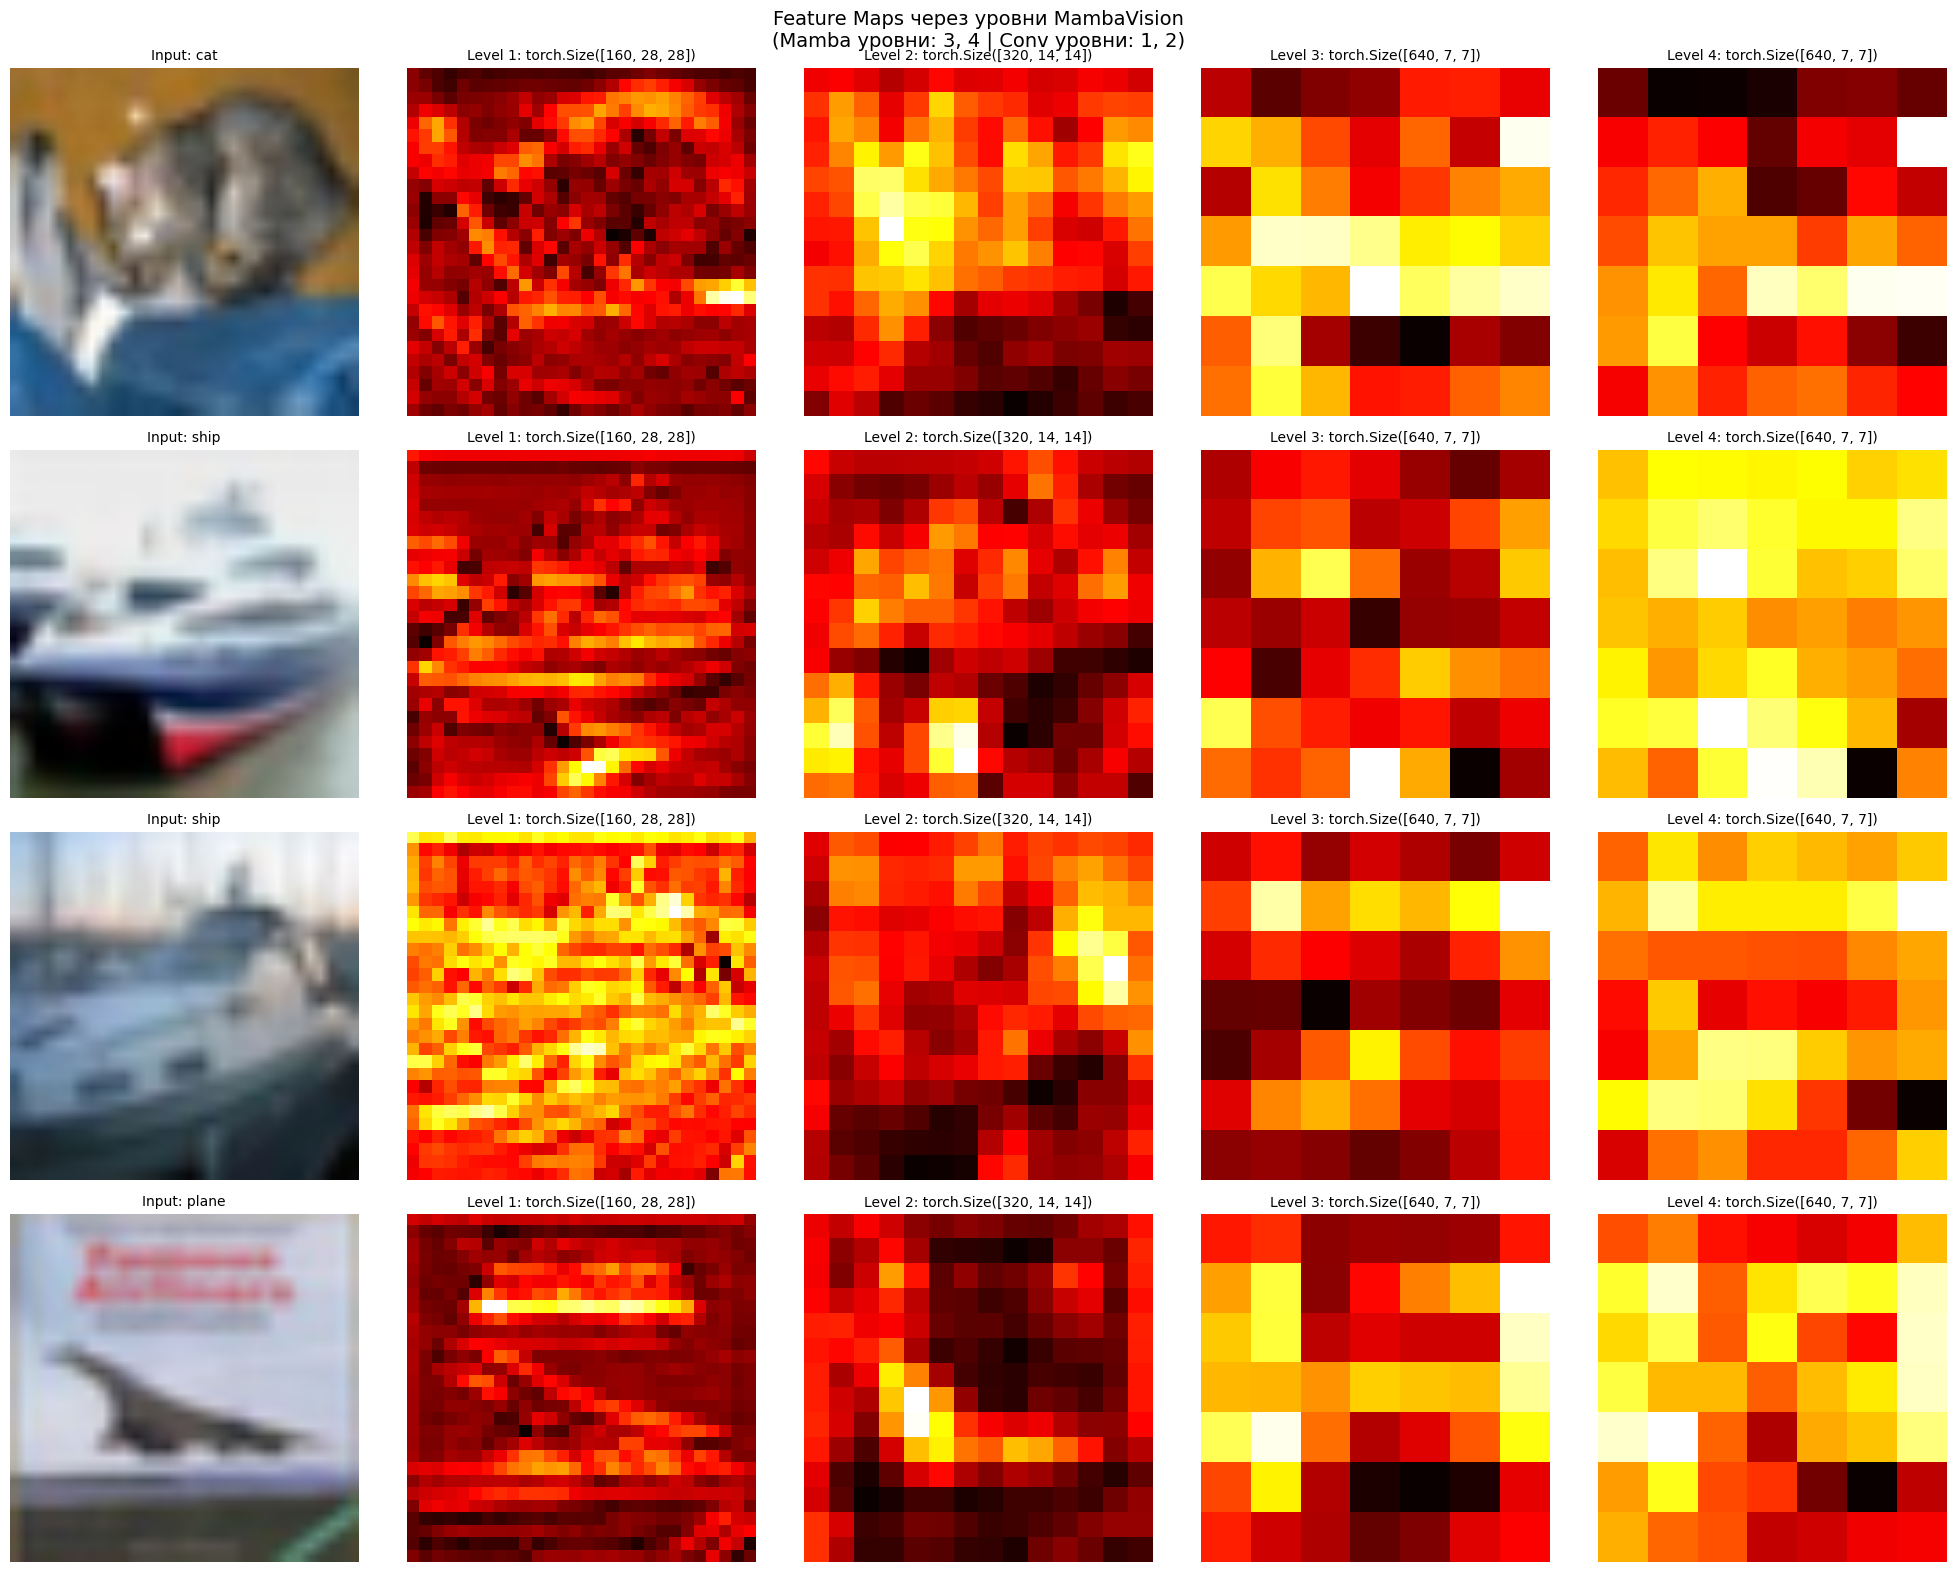

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

mamba_blocks = []
for level in model.levels:
    if hasattr(level, 'blocks'):
        for block in level.blocks:
            if hasattr(block, 'mixer') and isinstance(block.mixer, MambaVisionMixer):
                mamba_blocks.append(block.mixer)

print(f"Найдено MambaVisionMixer блоков: {len(mamba_blocks)}")

if len(mamba_blocks) > 0:
    mixer = mamba_blocks[0]
    
    A = -torch.exp(mixer.A_log.data).cpu().numpy()
    im1 = axes[0, 0].imshow(A, aspect='auto', cmap='viridis')
    axes[0, 0].set_title('SSM Matrix A (Layer 1)\nКонтролирует затухание состояний', fontsize=11)
    axes[0, 0].set_xlabel('State dimension')
    axes[0, 0].set_ylabel('Inner dimension')
    plt.colorbar(im1, ax=axes[0, 0])

    D = mixer.D.data.cpu().numpy()
    axes[0, 1].bar(range(len(D)), D, color='steelblue', alpha=0.7)
    axes[0, 1].set_title('Skip Connection D (Layer 1)\nПрямое влияние входа на выход', fontsize=11)
    axes[0, 1].set_xlabel('Dimension')
    axes[0, 1].set_ylabel('D value')
    axes[0, 1].axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='init=1.0')
    axes[0, 1].legend()

    dt_bias = mixer.dt_proj.bias.data.cpu().numpy()
    axes[0, 2].hist(dt_bias, bins=50, color='green', alpha=0.7, edgecolor='black')
    axes[0, 2].set_title('Delta (dt) Bias Distribution\nКонтролирует скорость обновления состояний', fontsize=11)
    axes[0, 2].set_xlabel('dt bias value')
    axes[0, 2].set_ylabel('Count')

    in_proj_weight = mixer.in_proj.weight.data.cpu().numpy()
    im4 = axes[1, 0].imshow(in_proj_weight, aspect='auto', cmap='coolwarm', vmin=-0.5, vmax=0.5)
    axes[1, 0].set_title('Input Projection Weights\nПреобразование входа в x и z ветки', fontsize=11)
    axes[1, 0].set_xlabel('Input dim')
    axes[1, 0].set_ylabel('Output dim')
    plt.colorbar(im4, ax=axes[1, 0])

    out_proj_weight = mixer.out_proj.weight.data.cpu().numpy()
    im5 = axes[1, 1].imshow(out_proj_weight, aspect='auto', cmap='coolwarm', vmin=-0.5, vmax=0.5)
    axes[1, 1].set_title('Output Projection Weights\nОбъединение SSM выхода', fontsize=11)
    axes[1, 1].set_xlabel('Input dim')
    axes[1, 1].set_ylabel('Output dim')
    plt.colorbar(im5, ax=axes[1, 1])

    x_proj_weight = mixer.x_proj.weight.data.cpu().numpy()
    im6 = axes[1, 2].imshow(x_proj_weight, aspect='auto', cmap='coolwarm')
    axes[1, 2].set_title('X Projection (→ dt, B, C)\nГенерация SSM параметров из входа', fontsize=11)
    axes[1, 2].set_xlabel('Input dim')
    axes[1, 2].set_ylabel('dt_rank + 2*d_state')
    plt.colorbar(im6, ax=axes[1, 2])

plt.tight_layout()
plt.savefig('mamba_ssm_weights.png', dpi=150)
plt.show()

fig, axes = plt.subplots(1, len(mamba_blocks), figsize=(4*len(mamba_blocks), 4))
if len(mamba_blocks) == 1:
    axes = [axes]

for idx, mixer in enumerate(mamba_blocks):
    A = -torch.exp(mixer.A_log.data).cpu().numpy()
    decay_rates = A.mean(axis=1)
    axes[idx].bar(range(len(decay_rates)), decay_rates, alpha=0.7)
    axes[idx].set_title(f'Mamba Block {idx+1}\nAvg Decay Rate per Channel', fontsize=10)
    axes[idx].set_xlabel('Channel')
    axes[idx].set_ylabel('Decay (более отриц. = быстрее забывает)')

plt.tight_layout()
plt.savefig('mamba_decay_comparison.png', dpi=150)
plt.show()

model.eval()
test_images, test_labels = next(iter(test_loader))
test_images = test_images[:4].to(device)

activations = {}

def get_activation(name):
    def hook(model, input, output):
        if isinstance(output, torch.Tensor):
            activations[name] = output.detach().cpu()
    return hook

hooks = []
for i, level in enumerate(model.levels):
    hooks.append(level.register_forward_hook(get_activation(f'level_{i}')))

with torch.no_grad():
    _ = model(test_images)

for h in hooks:
    h.remove()

mean = torch.tensor([0.4914, 0.4822, 0.4465])
std = torch.tensor([0.2470, 0.2435, 0.2616])

fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for img_idx in range(4):
    img = test_images[img_idx].cpu()
    img = img * std.view(3, 1, 1) + mean.view(3, 1, 1)
    img = img.permute(1, 2, 0).clamp(0, 1).numpy()
    
    axes[img_idx, 0].imshow(img)
    axes[img_idx, 0].set_title(f'Input: {classes[test_labels[img_idx]]}', fontsize=10)
    axes[img_idx, 0].axis('off')
    
    for level_idx in range(4):
        act = activations[f'level_{level_idx}'][img_idx]
        act_mean = act.mean(dim=0).numpy()
        
        axes[img_idx, level_idx + 1].imshow(act_mean, cmap='hot')
        axes[img_idx, level_idx + 1].set_title(f'Level {level_idx+1}: {act.shape}', fontsize=10)
        axes[img_idx, level_idx + 1].axis('off')

plt.suptitle('Feature Maps через уровни MambaVision\n(Mamba уровни: 3, 4 | Conv уровни: 1, 2)', fontsize=14)
plt.tight_layout()
plt.savefig('mamba_feature_maps.png', dpi=150)
plt.show()

1. МАТРИЦА A (SSM State Decay):
   - Контролирует как быстро "забывается" предыдущий контекст
   - Более отрицательные значения = быстрее затухание = локальные паттерны
   - Менее отрицательные = долгая память = глобальные зависимости
   
2. ПАРАМЕТР D (Skip Connection):
   - Прямой путь от входа к выходу, минуя SSM
   - Значения близкие к 1.0 = сохранение входной информации
   - Позволяет модели выбирать между SSM-обработкой и прямым проходом

3. DELTA (dt) BIAS:
   - Контролирует "скорость" дискретизации непрерывного SSM
   - Большие значения = быстрое обновление состояния
   - Маленькие = медленное, плавное обновление
   
4. INPUT/OUTPUT PROJECTIONS:
   - Разделяют вход на x (для SSM) и z (для gate)
   - Паттерны показывают какие входные фичи важны для каких выходов

5. X PROJECTION → (dt, B, C):
   - Генерирует ЗАВИСИМЫЕ ОТ ВХОДА параметры SSM
   - Это ключевое отличие Mamba от S4 (selective scan)
   - Позволяет модели адаптивно выбирать что запоминать

6. FEATURE MAPS:
   - Level 1-2 (Conv): локальные edge/texture детекторы
   - Level 3-4 (Mamba+Attention): семантические фичи, части объектов
   - Mamba эффективно агрегирует контекст через последовательность патчей

